In [43]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import time

For simulating it when we're not connected:

In [44]:
from scipy.signal import sawtooth
N=500

def get_traces():
    time.sleep(0.1)
    t0 = np.random.random()*10
    t = np.linspace(0,15,N)
    x = sawtooth(t+t0,width=0.5)*3
    y = sawtooth(t+t0,width=0.5)*8
    x += np.random.normal(size=N)*0.2
    y += np.random.normal(size=N)*0.1
    return x,y,t

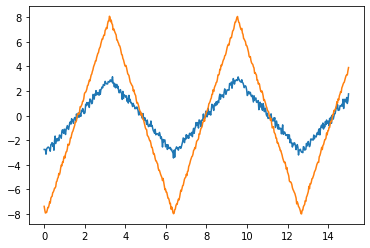

In [45]:
x,y,t = get_traces()
plt.plot(t,x)
plt.plot(t,y)

## A try with matplotlib inline update


In [46]:
%matplotlib inline

In [47]:
%matplotlib notebook

<IPython.core.display.Javascript object>


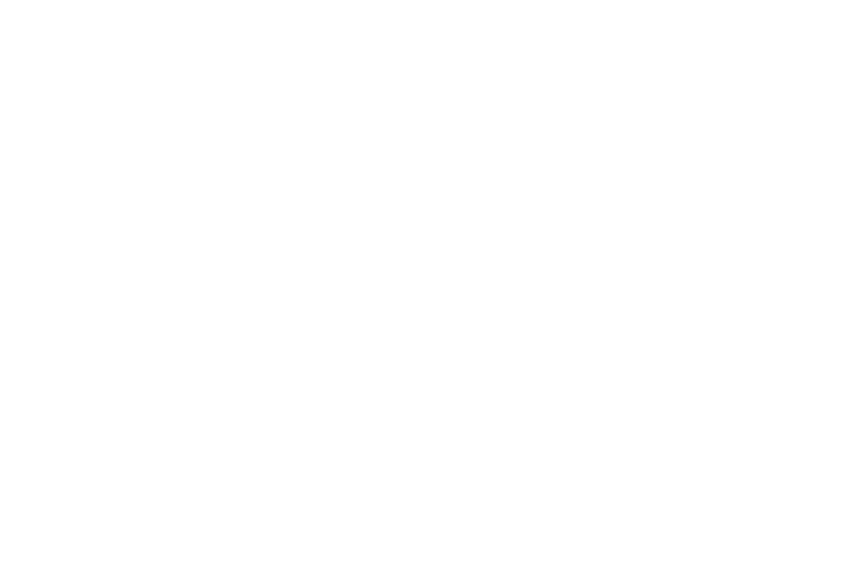

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


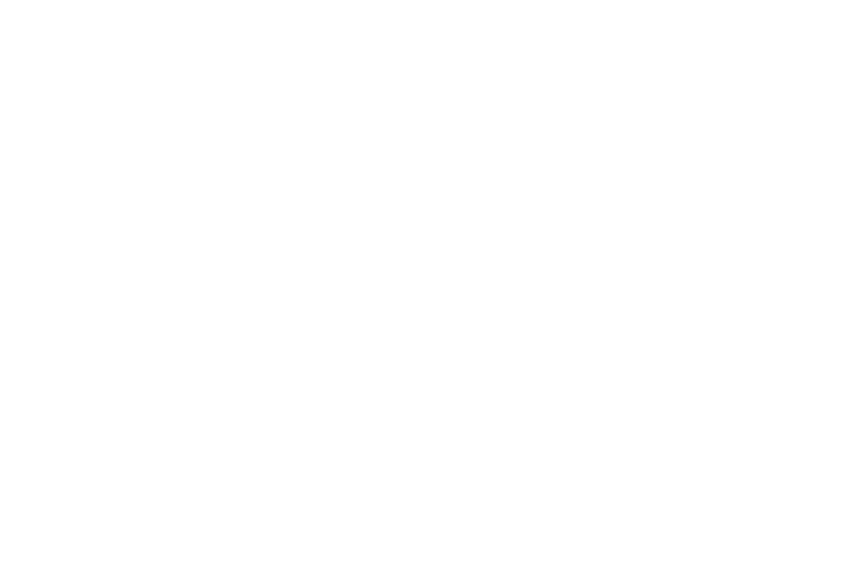

In [50]:
fig,ax = plt.subplots()
x,y,t = get_traces()
line1, = ax.plot(t,x)
line2, = ax.plot(t,y)
plt.ylabel('Voltage')
plt.xlabel('Time (seconds)')
plt.show()

while True:
    x,y,t = get_traces()
    line1.set_data(t,x)
    line2.set_data(t,y)
    fig.canvas.draw()

The matplotlib notebook driver is just plain flaky...try bokeh

## Try with Bokeh

An internet site suggested that this should work, but it doesn't...

In [51]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, push_notebook
output_notebook()

from math import pi
import numpy as np
from time import sleep

p = figure(title="X vs Random Number Generator", plot_height=350, plot_width=800)
target = show(p, notebook_handle=True)

x, y = [], []

for i in range(100):
    x,y,t = get_traces()
    p.line(t, x)
    push_notebook(handle=target)
    sleep(0.001)

Loading BokehJS ...

KeyboardInterrupt: 

In [54]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, push_notebook
output_notebook()

from math import pi
import numpy as np
from time import sleep

p = figure(title="X vs Random Number Generator", plot_height=350, plot_width=800)
target = show(p, notebook_handle=True)

x,y,t = get_traces()
source = ColumnDataSource(data=dict(x=t, y=x))
p.line('x', 'y', source=source)

for i in range(100):
    x,y,t = get_traces()
    source.data = dict(x=t, y=x)
    push_notebook(handle=target)
    sleep(0.001)

Loading BokehJS ...